In [28]:
import pandas as pd
df = pd.read_csv('data/Reviews.csv')

In [31]:
import nltk

In [34]:
RegexpTokenizer?

Init signature:
RegexpTokenizer(
    pattern,
    gaps=False,
    discard_empty=True,
    flags=re.UNICODE|re.MULTILINE|re.DOTALL,
)
Docstring:     
A tokenizer that splits a string using a regular expression, which
matches either the tokens or the separators between tokens.

    >>> tokenizer = RegexpTokenizer(r'\w+|\$[\d\.]+|\S+')

:type pattern: str
:param pattern: The pattern used to build this tokenizer.
    (This pattern must not contain capturing parentheses;
    Use non-capturing parentheses, e.g. (?:...), instead)
:type gaps: bool
:param gaps: True if this tokenizer's pattern should be used
    to find separators between tokens; False if this
    tokenizer's pattern should be used to find the tokens
    themselves.
:type discard_empty: bool
:param discard_empty: True if any empty tokens `''`
    generated by the tokenizer should be discarded.  Empty
    tokens can only be generated if `_gaps == True`.
:type flags: int
:param flags: The regexp flags used to compile this
    tok

In [37]:
word_tokenize("I can't do it")

['I', 'ca', "n't", 'do', 'it']

In [44]:
from nltk.tokenize import word_tokenize

reviews = list(df['review'].map(lambda x: ' '.join([s.lower() for s in word_tokenize(x)])))

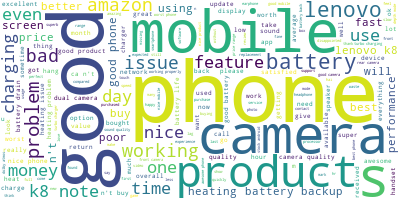

In [47]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(reviews)
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()


In [49]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
# stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]

data_words = list(sent_to_words(reviews))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yuchen.jiang2/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['good', 'need', 'updates', 'improvements']


In [51]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1)]


In [52]:
from pprint import pprint
# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.018*"mobile" + 0.016*"heating" + 0.016*"lenovo" + 0.014*"phone" + '
  '0.013*"camera" + 0.013*"battery" + 0.013*"issue" + 0.011*"good" + '
  '0.011*"problem" + 0.009*"buy"'),
 (1,
  '0.035*"good" + 0.031*"phone" + 0.023*"nice" + 0.020*"battery" + '
  '0.020*"camera" + 0.011*"mobile" + 0.011*"one" + 0.010*"note" + '
  '0.008*"quality" + 0.008*"product"'),
 (2,
  '0.023*"product" + 0.019*"phone" + 0.016*"time" + 0.014*"note" + '
  '0.012*"problem" + 0.012*"nice" + 0.012*"good" + 0.012*"lenovo" + '
  '0.011*"money" + 0.011*"poor"'),
 (3,
  '0.035*"mobile" + 0.023*"camera" + 0.018*"phone" + 0.016*"bad" + '
  '0.015*"nice" + 0.015*"battery" + 0.014*"working" + 0.013*"buy" + '
  '0.012*"best" + 0.011*"worst"'),
 (4,
  '0.079*"good" + 0.032*"camera" + 0.026*"phone" + 0.024*"battery" + '
  '0.016*"product" + 0.012*"quality" + 0.011*"lenovo" + 0.010*"performance" + '
  '0.008*"mobile" + 0.008*"note"'),
 (5,
  '0.040*"phone" + 0.037*"product" + 0.032*"good" + 0.030*"battery" + '
  '0.0

In [56]:
LDAvis_data_filepath

'./results/ldavis_prepared_10'

In [59]:
import pyLDAvis.gensim
import os
import pickle 
import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('data/results/ldavis_prepared_'+str(num_topics))
LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)

# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
'''
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, 'data/results/ldavis_prepared_'+ str(num_topics) +'.html')
LDAvis_prepared
'''

/Users/yuchen.jiang2/personal/repos/playground/env/lib/python3.8/site-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


"\nif 1 == 1:\n    LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)\n    with open(LDAvis_data_filepath, 'wb') as f:\n        pickle.dump(LDAvis_prepared, f)\n# load the pre-prepared pyLDAvis data from disk\nwith open(LDAvis_data_filepath, 'rb') as f:\n    LDAvis_prepared = pickle.load(f)\npyLDAvis.save_html(LDAvis_prepared, 'data/results/ldavis_prepared_'+ str(num_topics) +'.html')\nLDAvis_prepared\n"

In [60]:
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6      0.017582 -0.001464       1        1  25.600992
4      0.044873  0.020221       2        1  15.362569
5      0.016489 -0.014510       3        1  11.490518
8      0.020513 -0.006163       4        1  11.219662
9      0.013794  0.006336       5        1   8.273570
3     -0.028903 -0.039648       6        1   6.938193
1      0.014172  0.022581       7        1   5.914653
0     -0.026787 -0.042991       8        1   5.689666
7     -0.007540  0.006188       9        1   5.475432
2     -0.064192  0.049450      10        1   4.034743, topic_info=        Term         Freq        Total Category  logprob  loglift
55     phone  6638.000000  6638.000000  Default  30.0000  30.0000
0       good  5946.000000  5946.000000  Default  29.0000  29.0000
130  product  2081.000000  2081.000000  Default  28.0000  28.0000
35    mobile  2347.000000  2347.000000  Default  27.0000  27.0000
259     nice  1384.000000  1384.000000  Default  26.0000  26.0000
..       ...          ...          ...      ...      ...      ...
0       good    85.104472  5946.648948  Topic10  -4.4081  -1.0365
6    battery    57.400164  3310.402566  Topic10  -4.8020  -0.8446
98   heating    34.605094  1292.866503  Topic10  -5.3080  -0.4104
46      back    30.781286   662.428647  Topic10  -5.4251   0.1412
35    mobile    33.262598  2347.867509  Topic10  -5.3476  -1.0466

[869 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
4570      6  0.714688        aaguthu
8158      2  0.173930            aaj
8158      6  0.521789            aaj
8485      8  0.542998      absorbing
8059      8  0.723720          achaa
...     ...       ...            ...
4582      4  0.558202  yupprocessing
7290      4  0.751037         zoomed
7732      8  0.723823            कसल
7735      8  0.723886             मग
3943      6  0.537875             லல

[2296 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 5, 6, 9, 10, 4, 2, 1, 8, 3])